# Liver diseases 
## **Analysis for a dataset with imbalanced data.**

# Preprocessing and Feature Engineering

In [1]:
# załadowanie bibliotek
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, average_precision_score, recall_score, precision_score, f1_score, make_scorer, fbeta_score, matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier
from sklearn_evaluation import plot
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

sns.set_theme(style = "whitegrid")
%matplotlib inline

In [2]:
# load data
liver = pd.read_csv('liver_final.csv')
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
# defining the target variable and attributes
y = liver['Outcome']
x = liver.drop('Outcome', axis = 1)

In [4]:
# cross-validation method
skf = StratifiedKFold(n_splits=5)

## Selection of important features


## Recursive Feature Elimination with Cross-Validation

In [5]:
rfc = RandomForestClassifier(random_state = 45)
model = RFECV(estimator = rfc, cv = skf)
model = model.fit(x, y)

In [6]:
# empty list to which information about important parameters will be added
feature_info = []

for i in range(x.shape[1]):
    ranking = model.ranking_[i]
    feature_info.append({'feature_name': x.columns[i], 'support': model.support_[i], 'ranking': ranking})

# DataFrame to display 
df_features = pd.DataFrame(feature_info)

# Sorting DataFrame
df_features = df_features.sort_values(by='ranking')
df_features

,feature_name,support,ranking
0,Age,True,1
1,Gender,True,1
2,Total_Bilirubin,True,1
3,Direct_Bilirubin,True,1
4,Alkaline_Phosphotase,True,1
5,Alamine_Aminotransferase,True,1
6,Aspartate_Aminotransferase,True,1
7,Total_Protiens,True,1
8,Albumin,True,1
9,Albumin_and_Globulin_Ratio,True,1


In [7]:
feat_list = []
included_feats = []
total_importance = 0

# Displaying the most important columns
for feature in zip(x.columns, model.estimator_.feature_importances_):
    feat_list.append(feature)
    total_importance += feature[1]
# Display variable name and value by gini index
for feature in zip(x.columns, model.estimator_.feature_importances_):
    if feature[1] > .05:
        included_feats.append(feature[0])         
print('\n',"Total importance =", total_importance.round(2))

# DataFrame to display the results
df_imp = pd.DataFrame(feat_list, columns =['Feature', 'Score']).sort_values(by = 'Score', ascending = False)
df_imp['Importance'] = df_imp['Score'].cumsum()
df_imp


 Total importance = 1.0


,Feature,Score,Importance
4,Alkaline_Phosphotase,0.154353,0.154353
5,Alamine_Aminotransferase,0.129576,0.283929
6,Aspartate_Aminotransferase,0.124624,0.408553
0,Age,0.120085,0.528637
2,Total_Bilirubin,0.113337,0.641974
7,Total_Protiens,0.094643,0.736617
8,Albumin,0.083492,0.820110
3,Direct_Bilirubin,0.081221,0.901331
9,Albumin_and_Globulin_Ratio,0.079721,0.981052
1,Gender,0.018948,1.000000


### According to this method, all features are important.

## ExtraTreesClassifier method

In [8]:
model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)

[0.11803721 0.02624039 0.11412287 0.10593619 0.1166834  0.11434743
 0.11683359 0.08905775 0.10070047 0.09804071]


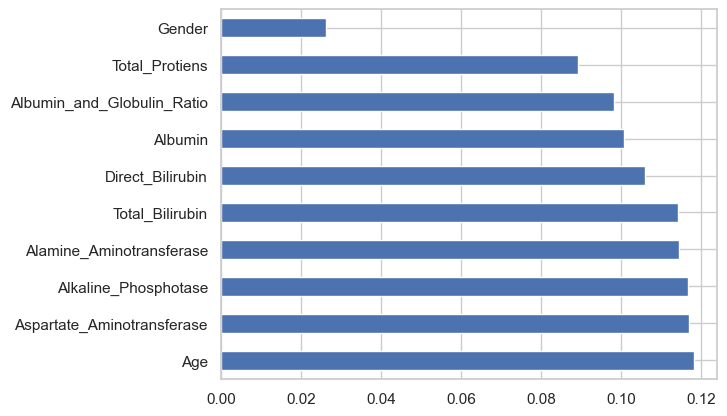

In [9]:
feature_importances = pd.Series(model.feature_importances_, index = x.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

### According to this method, Gender is the least important.

## Set new x and y

In [10]:
# defining a new target variable and attributes
y_new = liver['Outcome']
feature = ['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Aspartate_Aminotransferase'] # na końcu sama dobrałam atrybuty, żeby uzyskać lepsze wyniki
x_new = liver[feature]
print(x_new)
print(y_new)

     Age  Total_Bilirubin  Alkaline_Phosphotase  Alamine_Aminotransferase  \
0     65              0.7                   187                        16   
1     62             10.9                   699                        64   
2     62              7.3                   490                        60   
3     58              1.0                   182                        14   
4     72              3.9                   195                        27   
..   ...              ...                   ...                       ...   
561   60              0.5                   500                        20   
562   40              0.6                    98                        35   
563   52              0.8                   245                        48   
564   31              1.3                   184                        29   
565   38              1.0                   216                        21   

     Total_Protiens  Albumin  Albumin_and_Globulin_Ratio  \
0              

In [11]:
# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.15, stratify = y_new, random_state = 16)

# Print the shapes of the resulting sets
print("Training set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

print("Counts of label '1': {}".format(sum(y_train == 1)))
print("Counts of label '0': {} \n".format(sum(y_train == 0)))

Training set: (481, 8) (481,)
Test set: (85, 8) (85,)
Counts of label '1': 343
Counts of label '0': 138 



In [12]:
# Data standardization
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Selection of hyperparameters using cross-validation

In [13]:
np.random.seed(30)

# Classifiers with parameters
classifiers = [
    ('KNN', KNeighborsClassifier(), {
        'classifier__n_neighbors': [3, 5, 7, 10],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__p': [1, 2]
    }),
    ('Random Forest', RandomForestClassifier(), {
       'classifier__n_estimators': list(range(10, 51, 10)),
       'classifier__criterion': ['gini', 'entropy'],
       'classifier__max_depth': [1, 2, 3, 4, 5, 10],
      'classifier__min_samples_split': list(range(2, 4)),
      'classifier__min_samples_leaf': list(range(2, 4))
    }),
    ('NB', GaussianNB(), {
        'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
    }),
    ('LogR', LogisticRegression(max_iter=2000), {
       'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
       'classifier__penalty': ['l1', 'l2'],
       'classifier__solver': ['liblinear', 'saga']
    }),
    ('SVM', SVC(probability=True), {
       'classifier__C': [0.1, 1, 10, 100, 1000],
       'classifier__kernel': ['linear', 'rbf'],
       'classifier__gamma': [0.0001, 0.001, 0.01, 0.1, 1]
    }),
    ('XGBoost', XGBClassifier(), {
        'classifier__max_depth': [2, 3, 4, 6],
        'classifier__gamma': [0, 0.4, 0.8],
        'classifier__learning_rate': [0.01, 0.1, 0.3, 0.4, 0.5],
        'classifier__n_estimators': [100, 200, 300],
        'classifier__reg_lambda': [0, 0.1, 1],
        'classifier__reg_alpha': [0.1, 1]
    }),
    ('CART', DecisionTreeClassifier(), {
        'classifier__criterion'         : ['gini', 'entropy'],
        'classifier__max_features': ['sqrt', 'log2'],
        'classifier__max_depth'         : [2,4,6,8,10,12],
        'classifier__min_samples_split' : list(range(2,10)),
        'classifier__min_samples_leaf'  : list(range(1,10))
    })
]

# Pipeline with classifiers
classifier_pipeline = Pipeline([
    ('classifier', KNeighborsClassifier())  # classifier will be replaced with the appropriate classifier during data flow
])

# Metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, zero_division=1),
    'recall': make_scorer(recall_score, zero_division=1),
    'f1': make_scorer(f1_score),
    'f2': make_scorer(fbeta_score, beta=2),
    'specificity': make_scorer(
        lambda y_true, y_pred:
        recall_score(y_true, y_pred, pos_label=0)),
    'mcc': make_scorer(matthews_corrcoef),
    'sensitivity': make_scorer(recall_score)
} 


In [14]:
# Display results
best_classifiers = []
for name, clf, param in classifiers:
    classifier_pipeline.set_params(classifier=clf)
    # Grid Search
    search = GridSearchCV(estimator=classifier_pipeline, param_grid=param, cv=skf, scoring=scoring, refit='recall', n_jobs=-1, verbose=1)
    search.fit(x_new, y_new)
    print(f"Best parameters for {name} (Grid Search):", search.best_params_)
    print(f"Best estimator for {name} (Grid Search):", search.best_estimator_)
    print(f"Best scores for {name} (Grid Search):", search.best_score_)
    # Randomized Search
    random_search = RandomizedSearchCV(estimator=classifier_pipeline, param_distributions=param, n_iter=9, scoring=scoring, refit="recall", n_jobs=-1, return_train_score=True, cv=skf, verbose=1)
    random_search.fit(x_new, y_new)
    print(f"Best parameters for {name} (Randomized Search):", random_search.best_params_)
    print(f"Best estimator for {name} (Randomized Search):", random_search.best_estimator_)

    best_classifiers.append((name, search.best_estimator_))
    best_classifiers.append((name, random_search.best_estimator_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


Best parameters for KNN (Grid Search): {'classifier__n_neighbors': 10, 'classifier__p': 2, 'classifier__weights': 'distance'}
Best estimator for KNN (Grid Search): Pipeline(steps=[('classifier',
                 KNeighborsClassifier(n_neighbors=10, weights='distance'))])
Best scores for KNN (Grid Search): 0.8417592592592593
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for KNN (Randomized Search): {'classifier__weights': 'uniform', 'classifier__p': 2, 'classifier__n_neighbors': 7}
Best estimator for KNN (Randomized Search): Pipeline(steps=[('classifier', KNeighborsClassifier(n_neighbors=7))])
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best parameters for Random Forest (Grid Search): {'classifier__criterion': 'gini', 'classifier__max_depth': 1, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 10}
Best estimator for Random Forest (Grid Search): Pipeline(steps=[('classifier',
             

C:\Users\macio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters for LogR (Randomized Search): {'classifier__solver': 'saga', 'classifier__penalty': 'l2', 'classifier__C': 0.001}
Best estimator for LogR (Randomized Search): Pipeline(steps=[('classifier',
                 LogisticRegression(C=0.001, max_iter=2000, solver='saga'))])
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for SVM (Grid Search): {'classifier__C': 0.1, 'classifier__gamma': 0.0001, 'classifier__kernel': 'linear'}
Best estimator for SVM (Grid Search): Pipeline(steps=[('classifier',
                 SVC(C=0.1, gamma=0.0001, kernel='linear', probability=True))])
Best scores for SVM (Grid Search): 1.0
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for SVM (Randomized Search): {'classifier__kernel': 'rbf', 'classifier__gamma': 0.001, 'classifier__C': 0.1}
Best estimator for SVM (Randomized Search): Pipeline(steps=[('classifier', SVC(C=0.1, gamma=0.001, probability=True))])
Fitting 5 folds for each of 1080 candi

In [15]:
classifier_param = []
for name, estimator in best_classifiers:
    classifier_param.append({
        'Classifier': name,
        'Best Parameters': str(estimator.named_steps['classifier'].get_params()),  
})

# DataFrame to display 
df_classifier_param = pd.DataFrame(classifier_param)
pd.set_option('display.max_colwidth', None)  
df_classifier_param

,Classifier,Best Parameters
0,KNN,"{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}"
1,KNN,"{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}"
2,Random Forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}"
3,Random Forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 40, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}"
4,NB,"{'priors': None, 'var_smoothing': 1e-09}"
5,NB,"{'priors': None, 'var_smoothing': 1e-09}"
6,LogR,"{'C': 0.001, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 2000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}"
7,LogR,"{'C': 0.001, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 2000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}"
8,SVM,"{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.0001, 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}"
9,SVM,"{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}"


In [16]:
# Metrics for best estimators
# checking whether to select results from GridSearch or RandomSearch
# list for collecting metrics results
metrics_data = []


for name, estimator in best_classifiers:
    estimator.fit(x_new, y_new)
    y_pred = estimator.predict(x_new)
    
    # Metrics
    accuracy = round(accuracy_score(y_new, y_pred), 2)
    precision = round(precision_score(y_new, y_pred), 2)
    recall = round(recall_score(y_new, y_pred), 2)
    f1 = round(f1_score(y_new, y_pred), 2)
    f2 = round(fbeta_score(y_new, y_pred, beta=2), 2)
    specificity = round(recall_score(y_new, y_pred, pos_label=0), 2)
    sensitivity = round(recall_score(y_new, y_pred, pos_label=1), 2)
    mcc = round(matthews_corrcoef(y_new, y_pred), 2)
    
    metrics_dict = {
        'Classifier': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'F2': f2,
        'Specificity': specificity,
        'Sensitivity': sensitivity,
        'MCC': mcc,
    }
    
    metrics_data.append(metrics_dict)

# DataFrame for metrics
metrics_df = pd.DataFrame(metrics_data)
pd.set_option('display.max_columns', None) 
metrics_df

C:\Users\macio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,Classifier,Accuracy,Precision,Recall,F1,F2,Specificity,Sensitivity,MCC
0,KNN,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,KNN,0.77,0.80,0.91,0.85,0.89,0.43,0.91,0.40
2,Random Forest,0.71,0.71,1.00,0.83,0.93,0.00,1.00,0.00
3,Random Forest,0.71,0.71,1.00,0.83,0.93,0.00,1.00,0.00
4,NB,0.56,0.96,0.40,0.56,0.45,0.96,0.40,0.35
5,NB,0.56,0.96,0.40,0.56,0.45,0.96,0.40,0.35
6,LogR,0.71,0.71,1.00,0.83,0.93,0.00,1.00,0.00
7,LogR,0.71,0.71,1.00,0.83,0.93,0.00,1.00,0.00
8,SVM,0.71,0.71,1.00,0.83,0.93,0.00,1.00,0.00
9,SVM,0.71,0.71,1.00,0.83,0.93,0.00,1.00,0.00


## Once again calculated metrics for models with the best parameters in order to get rid of overfitting (I am making a new cross-val) and to pre-evaluate the models

In [17]:
np.random.seed(35)

# Classifiers
models = [
    ('KNN', KNeighborsClassifier(n_neighbors = 7, p = 1, weights = 'distance')),
    ('RF', RandomForestClassifier(criterion = 'entropy', max_depth = 4, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 10, max_features = 'sqrt')),
    ('CART', DecisionTreeClassifier(min_samples_split = 3, min_samples_leaf = 9, max_features = 'log2', max_depth = 2, criterion = 'entropy')),
    ('NB', GaussianNB(var_smoothing = 1e-09)),
    ('LogR', LogisticRegression(C = 1, penalty = 'l2', solver = 'liblinear')),
    ('SVM', SVC(probability=True, C=1000, gamma=0.0001, kernel='linear')),
    ('XGB', XGBClassifier(reg_lambda = 0.1, reg_alpha = 1, n_estimators = 100, max_depth = 4, learning_rate = 0.4, gamma = 0))]

# Metrics
cv_scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'f2': make_scorer(fbeta_score, beta=2),
    'specificity': make_scorer(
        lambda y_true, y_pred:
        recall_score(y_true, y_pred, pos_label=0)),
    'sensitivity': make_scorer(recall_score, pos_label=1),
    'mcc': make_scorer(matthews_corrcoef)}

# Empty DataFrame to collect results
results_cross_val_xy = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1', 'F2', 'Specificity', 'MCC', 'Sensitivity'])
result = []
names = []

# Apply cross-val for all classifiers
for name, model in models:
    results = cross_validate(model, x_new, y_new, cv = skf, scoring=cv_scoring, return_estimator=True)
    df = pd.DataFrame({
        'Classifier': [name],
        'Accuracy': [round(results['test_accuracy'].mean(), 2)],
        'Precision': [round(results['test_precision'].mean(), 2)],
        'Recall': [round(results['test_recall'].mean(), 2)],
        'F1': [round(results['test_f1'].mean(), 2)],
        'F2': [round(results['test_f2'].mean(), 2)],
        'Specificity': [round(results['test_specificity'].mean(), 2)],
        'Sensitivity': [round(results['test_sensitivity'].mean(), 2)],
        'MCC': [round(results['test_mcc'].mean(), 2)]})
    results_cross_val_xy = pd.concat([results_cross_val_xy, df], ignore_index=True)
    result.append(results)
    names.append(name)

results_cross_val_xy = results_cross_val_xy.sort_values(by='F2', ascending=False) # Sorting for the F2 metric
results_cross_val_xy = results_cross_val_xy.reset_index(drop=True) # Reset index
results_cross_val_xy # Display DataFrame

,Classifier,Accuracy,Precision,Recall,F1,F2,Specificity,MCC,Sensitivity
0,LogR,0.72,0.74,0.92,0.82,0.88,0.21,0.19,0.92
1,RF,0.69,0.74,0.89,0.81,0.86,0.20,0.14,0.89
2,CART,0.69,0.74,0.90,0.79,0.85,0.15,0.05,0.90
3,SVM,0.72,0.76,0.88,0.82,0.85,0.32,0.24,0.88
4,XGB,0.69,0.76,0.81,0.79,0.80,0.37,0.21,0.81
5,KNN,0.65,0.74,0.79,0.76,0.78,0.30,0.11,0.79
6,NB,0.58,0.96,0.43,0.58,0.48,0.95,0.37,0.43


## Preliminary evaluation:
## Top 3 best models:
## 1. XGB
## 2. KNN
## 3. RF
## Top 3 weakest models:
## 1. CART
## 2. SVM
## 3. NB
## I removed the parameters for SVM and LR because the model was getting overtrained.

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'KNN'),
  Text(2, 0, 'RF'),
  Text(3, 0, 'CART'),
  Text(4, 0, 'NB'),
  Text(5, 0, 'LogR'),
  Text(6, 0, 'SVM'),
  Text(7, 0, 'XGB')])

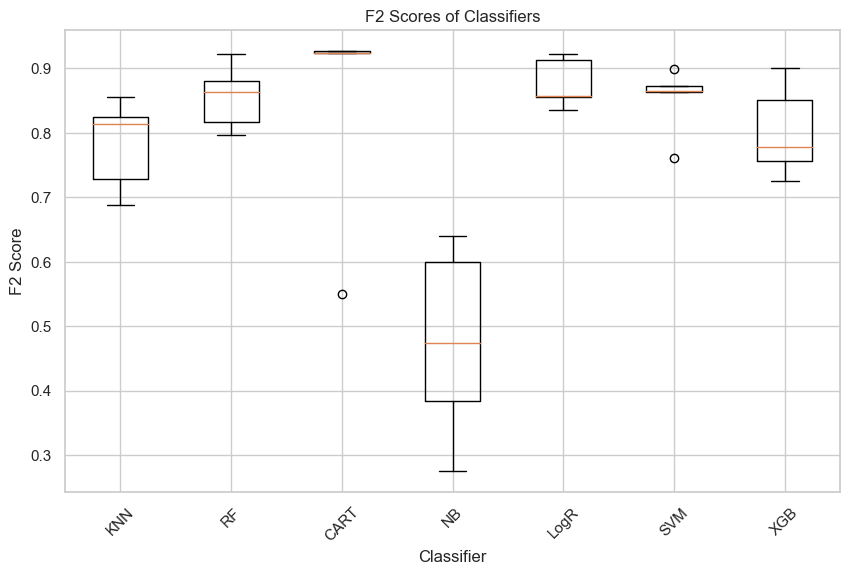

In [18]:
# F2 score - boxplot
f2_scores = [result['test_f2'] for result in result]
plt.figure(figsize=(10, 6))
plt.boxplot(f2_scores, labels=names)
plt.title('F2 Scores of Classifiers')
plt.xlabel('Classifier')
plt.ylabel('F2 Score')
plt.xticks(rotation=45)

In [19]:
np.random.seed(42)

# Model Training and Evaluation: 

## 1. KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors = 7, p = 2, weights = 'uniform')
model_knn = knn.fit(x_train, y_train) # model training
y_pred_knn_train = model_knn.predict(x_train) # prediction for the training set

In [21]:
# prediction on the test set
y_pred_val_knn = model_knn.predict(x_test)
y_pred_proba_val_knn = model_knn.predict_proba(x_test)[:, 1]

In [22]:
# Metrics for the test set  
accuracy_test = accuracy_score(y_test, y_pred_val_knn)
report_val = classification_report(y_test, y_pred_val_knn)
cm_val = confusion_matrix(y_test, y_pred_val_knn)
roc_auc_val = roc_auc_score(y_test, y_pred_proba_val_knn)
precision_val = precision_score(y_test, y_pred_val_knn)
f1_val = f1_score(y_test, y_pred_val_knn, average = 'weighted')
f2_val = fbeta_score(y_test, y_pred_val_knn, beta=2.0)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_val_knn).ravel()
specificity_test = tn / (tn + fp)
sensitivity_test = tp / (tp + fn)
mcc_val = matthews_corrcoef(y_test, y_pred_val_knn)

print("Accuracy :", accuracy_test.round(2))
print("Classification Report :\n", report_val)
print("Confusion Matrix :\n", cm_val)
print("ROC AUC:", roc_auc_val.round(2))
print("Precision:", precision_val.round(2))
print("F1 Score:", f1_val.round(2))
print("F2 Score:", f2_val.round(2))
print("Specificity:", specificity_test.round(2))
print("Sensitivity:", sensitivity_test.round(2))
print("MCC:", mcc_val.round(2))

Accuracy : 0.64
Classification Report :
               precision    recall  f1-score   support

           0       0.36      0.38      0.37        24
           1       0.75      0.74      0.74        61

    accuracy                           0.64        85
   macro avg       0.55      0.56      0.56        85
weighted avg       0.64      0.64      0.64        85

Confusion Matrix :
 [[ 9 15]
 [16 45]]
ROC AUC: 0.68
Precision: 0.75
F1 Score: 0.64
F2 Score: 0.74
Specificity: 0.38
Sensitivity: 0.74
MCC: 0.11


In [23]:
print('Report: training set \n', classification_report(y_train, y_pred_knn_train))
print('\n Report: test set \n', classification_report(y_test, y_pred_val_knn))

Report: training set 
               precision    recall  f1-score   support

           0       0.64      0.47      0.54       138
           1       0.81      0.90      0.85       343

    accuracy                           0.77       481
   macro avg       0.73      0.68      0.70       481
weighted avg       0.76      0.77      0.76       481


 Report: test set 
               precision    recall  f1-score   support

           0       0.36      0.38      0.37        24
           1       0.75      0.74      0.74        61

    accuracy                           0.64        85
   macro avg       0.55      0.56      0.56        85
weighted avg       0.64      0.64      0.64        85



AUC: 0.68


Text(0.5, 1.0, 'KNeighborsClassifier Model ROC curve; AUC: 0.68')

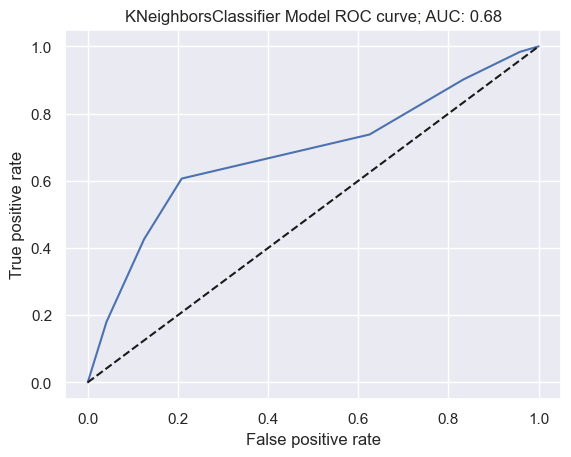

In [24]:
# AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_val_knn)
auc_knn = np.round(roc_auc_score(y_test, y_pred_proba_val_knn), 2)
print("AUC:", auc_knn) 

sns.set()
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(f'KNeighborsClassifier Model ROC curve; AUC: {auc_knn}')

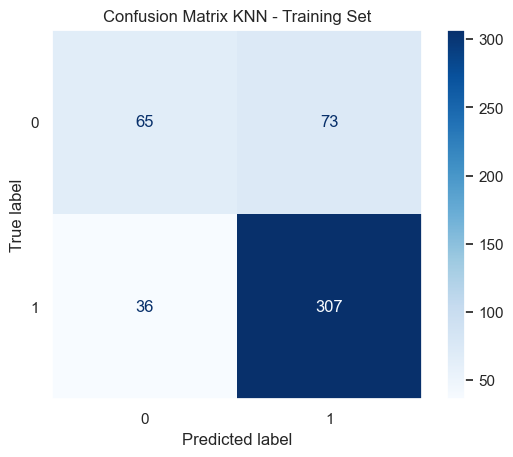

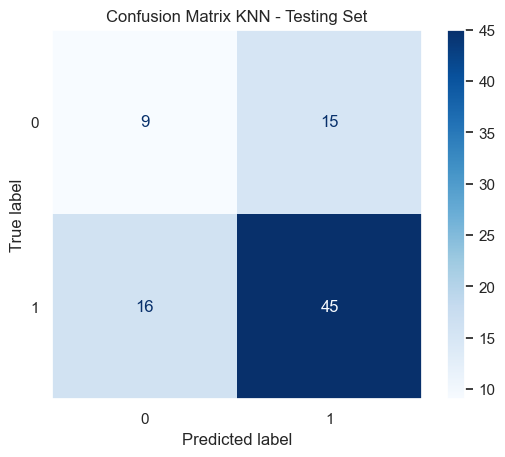

In [25]:
# Confusion matrix for the training set
confusion_display_train = ConfusionMatrixDisplay.from_predictions(y_train, y_pred_knn_train, cmap=plt.cm.Blues)
confusion_display_train.ax_.set_title('Confusion Matrix KNN - Training Set')
plt.grid(False)

# Confusion matrix for the test set 
confusion_display_test = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_val_knn, cmap=plt.cm.Blues)
confusion_display_test.ax_.set_title('Confusion Matrix KNN - Testing Set')
plt.grid(False)

## 2. RandomForestClassifier

In [26]:
rfc = RandomForestClassifier(class_weight = 'balanced', criterion = 'gini', max_depth = 10, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 30, max_features = 'sqrt')
model_rfc = rfc.fit(x_train, y_train) # model training 
y_pred_rfc_train = model_rfc.predict(x_train) # prediction for the training set 

In [27]:
# Prediction on the test set
y_pred_val_rfc = model_rfc.predict(x_test)
y_pred_proba_val_rfc = model_rfc.predict_proba(x_test)[:, 1]

In [28]:
# Metrics for the test set 
accuracy_test = accuracy_score(y_test, y_pred_val_rfc)
report_val = classification_report(y_test, y_pred_val_rfc)
cm_val = confusion_matrix(y_test, y_pred_val_rfc)
roc_auc_val = roc_auc_score(y_test, y_pred_proba_val_rfc)
precision_val = precision_score(y_test, y_pred_val_rfc)
f1_val = f1_score(y_test, y_pred_val_rfc, average = 'weighted')
f2_val = fbeta_score(y_test, y_pred_val_rfc, beta=2.0)
mcc_val = matthews_corrcoef(y_test, y_pred_val_rfc)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_val_rfc).ravel()
sensitivity_test = tp / (tp + fn)
specificity_test = tn / (tn + fp)

print("Accuracy:", accuracy_test.round(2))
print("Classification Report:\n", report_val)
print("Confusion Matrix:\n", cm_val)
print("ROC AUC:", roc_auc_val.round(2))
print("Precision:", precision_val.round(2))
print("F1 Score:", f1_val.round(2))
print("F2 Score:", f2_val.round(2))
print("Specificity:", specificity_test.round(2))
print("Sensitivity:", sensitivity_test.round(2))
print("MCC", mcc_val.round(2))

Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.38      0.37        24
           1       0.75      0.74      0.74        61

    accuracy                           0.64        85
   macro avg       0.55      0.56      0.56        85
weighted avg       0.64      0.64      0.64        85

Confusion Matrix:
 [[ 9 15]
 [16 45]]
ROC AUC: 0.64
Precision: 0.75
F1 Score: 0.64
F2 Score: 0.74
Specificity: 0.38
Sensitivity: 0.74
MCC 0.11


In [29]:
print('Report: training set \n', classification_report(y_train, y_pred_rfc_train))
print('\n Report: test set \n', classification_report(y_test, y_pred_val_rfc))

Report: training set 
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       138
           1       0.99      0.94      0.96       343

    accuracy                           0.95       481
   macro avg       0.93      0.96      0.94       481
weighted avg       0.95      0.95      0.95       481


 Report: test set 
               precision    recall  f1-score   support

           0       0.36      0.38      0.37        24
           1       0.75      0.74      0.74        61

    accuracy                           0.64        85
   macro avg       0.55      0.56      0.56        85
weighted avg       0.64      0.64      0.64        85



AUC: 0.64


Text(0.5, 1.0, 'RF Model ROC curve; AUC: 0.64')

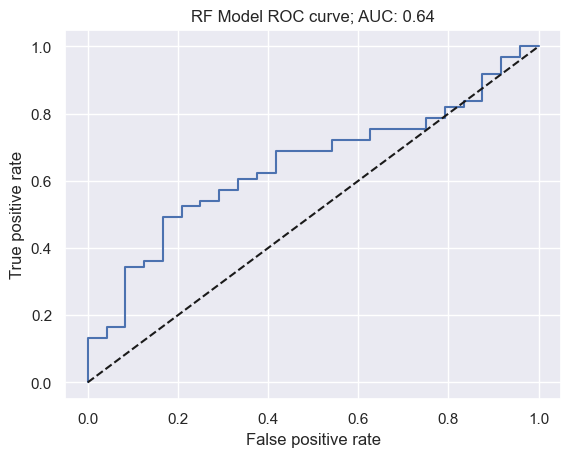

In [30]:
# AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_val_rfc)
auc_rfc = np.round(roc_auc_score(y_test, y_pred_proba_val_rfc), 2)
print("AUC:", auc_rfc) 

sns.set()
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(f'RF Model ROC curve; AUC: {auc_rfc}')

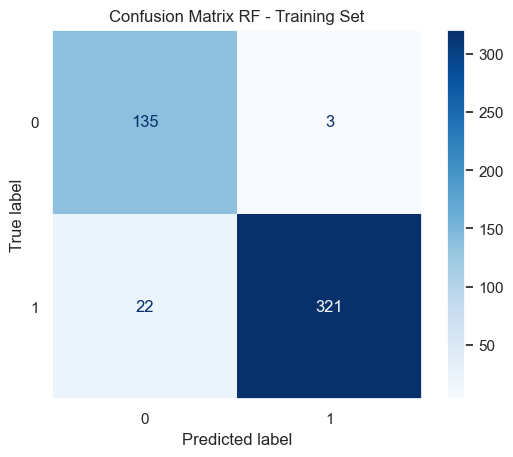

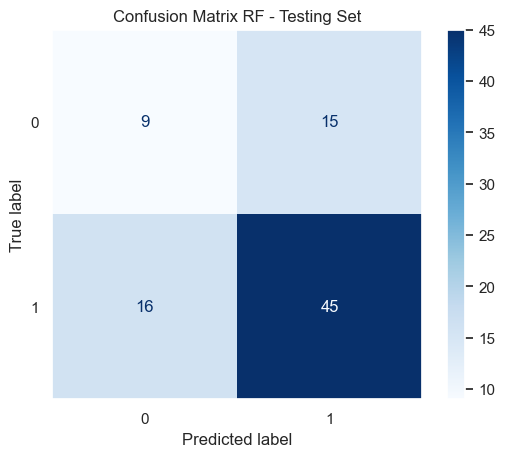

In [31]:
# Confusion matrix for the training set
confusion_display_train = ConfusionMatrixDisplay.from_predictions(y_train, y_pred_rfc_train, cmap = plt.cm.Blues)
confusion_display_train.ax_.set_title('Confusion Matrix RF - Training Set')
plt.grid(False)

# Confusion matrix for the test set 
confusion_display_test = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_val_rfc, cmap = plt.cm.Blues)
confusion_display_test.ax_.set_title('Confusion Matrix RF - Testing Set')
plt.grid(False)

### 3. Decision Tree Classifier

In [32]:
dtc = DecisionTreeClassifier(class_weight = 'balanced', min_samples_split = 3, min_samples_leaf = 1, max_features = 'log2', max_depth = 2, criterion = 'gini')
model_dtc = dtc.fit(x_train, y_train) # model training 
y_pred_dtc_train = model_dtc.predict(x_train)

In [33]:
# Prediction on the test set
y_pred_val_dtc = model_dtc.predict(x_test)
y_pred_proba_val_dtc = model_dtc.predict_proba(x_test)[:, 1]

In [34]:
# Metrics for the test set 
accuracy_test = accuracy_score(y_test, y_pred_val_dtc)
report_val = classification_report(y_test, y_pred_val_dtc, zero_division = 1)
cm_val = confusion_matrix(y_test, y_pred_val_dtc)
roc_auc_val = roc_auc_score(y_test, y_pred_proba_val_dtc)
precision_val = precision_score(y_test, y_pred_val_dtc, zero_division = 1)
f1_val = f1_score(y_test, y_pred_val_dtc, average = 'weighted')
f2_val = fbeta_score(y_test, y_pred_val_dtc, beta = 2.0)
mcc_val = matthews_corrcoef(y_test, y_pred_val_dtc)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_val_dtc).ravel()
specificity_test = tn / (tn + fp)
sensitivity_test = tp / (tp + fn)

print("Accuracy:", accuracy_test.round(2))
print("Classification Report:\n", report_val)
print("Confusion Matrix:\n", cm_val)
print("ROC AUC:", roc_auc_val.round(2))
print("Precision:", precision_val.round(2))
print("F1 Score:", f1_val.round(2))
print("F2 Score:", f2_val.round(2))
print("MCC:", mcc_val.round(2))
print("Specificity:", specificity_test.round(2))
print("Sensitivity:", sensitivity_test.round(2))

Accuracy: 0.54
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.79      0.49        24
           1       0.84      0.44      0.58        61

    accuracy                           0.54        85
   macro avg       0.60      0.62      0.54        85
weighted avg       0.71      0.54      0.56        85

Confusion Matrix:
 [[19  5]
 [34 27]]
ROC AUC: 0.63
Precision: 0.84
F1 Score: 0.56
F2 Score: 0.49
MCC: 0.22
Specificity: 0.79
Sensitivity: 0.44


In [35]:
print('Report: training set \n', classification_report(y_train, y_pred_dtc_train))
print('\n Report: test set \n', classification_report(y_test, y_pred_val_dtc))

Report: training set 
               precision    recall  f1-score   support

           0       0.43      0.84      0.57       138
           1       0.89      0.55      0.68       343

    accuracy                           0.63       481
   macro avg       0.66      0.69      0.62       481
weighted avg       0.76      0.63      0.65       481


 Report: test set 
               precision    recall  f1-score   support

           0       0.36      0.79      0.49        24
           1       0.84      0.44      0.58        61

    accuracy                           0.54        85
   macro avg       0.60      0.62      0.54        85
weighted avg       0.71      0.54      0.56        85



[Text(0.5, 0.8333333333333334, 'Aspartate_Aminotransferase <= -0.176\ngini = 0.5\nsamples = 481\nvalue = [240.5, 240.5]'),
 Text(0.25, 0.5, 'Age <= 1.27\ngini = 0.472\nsamples = 309\nvalue = [212.616, 131.118]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.456\nsamples = 272\nvalue = [202.159, 109.382]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.439\nsamples = 37\nvalue = [10.457, 21.736]'),
 Text(0.75, 0.5, 'Albumin_and_Globulin_Ratio <= 0.091\ngini = 0.324\nsamples = 172\nvalue = [27.884, 109.382]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.161\nsamples = 107\nvalue = [6.971, 72.22]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.461\nsamples = 65\nvalue = [20.913, 37.162]')]

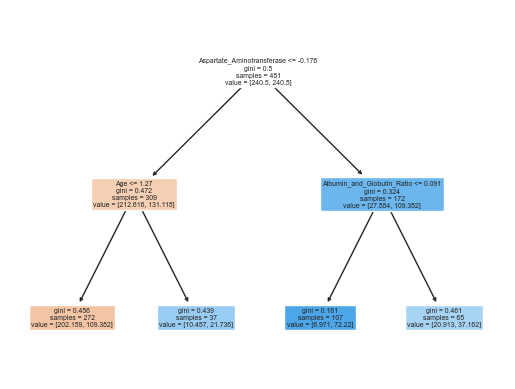

In [36]:
# Decision tree 
tree.plot_tree(dtc, feature_names = feature, filled = True)

AUC: 0.63


Text(0.5, 1.0, 'DecisionTree Model ROC curve; AUC: 0.63')

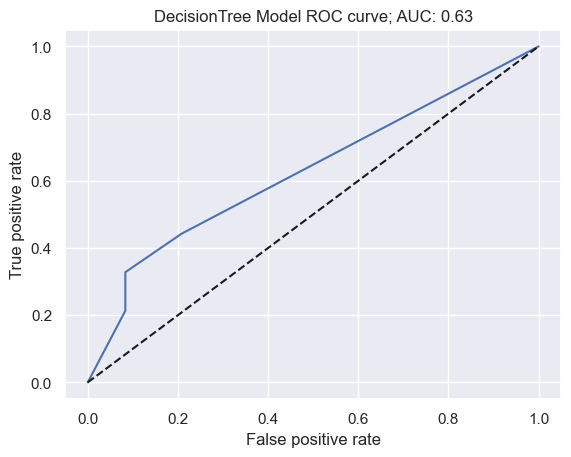

In [37]:
# AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_val_dtc)
auc_dtc = np.round(roc_auc_score(y_test, y_pred_proba_val_dtc), 2)
print("AUC:", auc_dtc) 

sns.set()
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(f'DecisionTree Model ROC curve; AUC: {auc_dtc}')

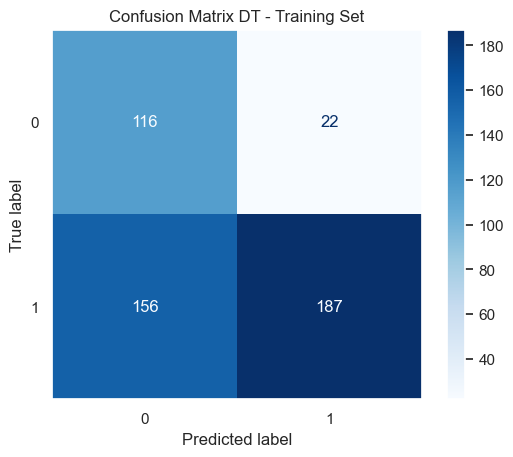

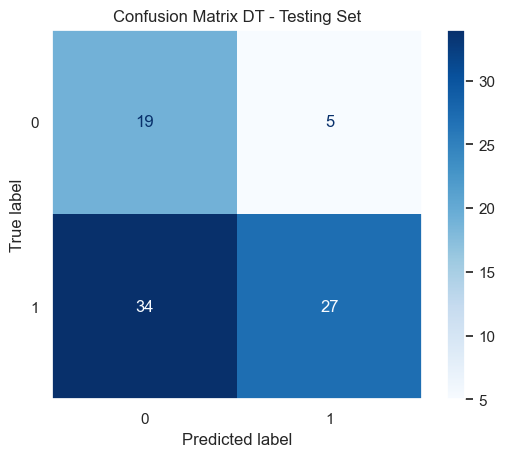

In [38]:
# Confusion matrix for the training set
confusion_display_train = ConfusionMatrixDisplay.from_predictions(y_train, y_pred_dtc_train, cmap = plt.cm.Blues)
confusion_display_train.ax_.set_title('Confusion Matrix DT - Training Set')
plt.grid(False)

# Confusion matrix for the test set 
confusion_display_test = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_val_dtc, cmap = plt.cm.Blues)
confusion_display_test.ax_.set_title('Confusion Matrix DT - Testing Set')
plt.grid(False)

## 4. Naive Bayes

In [39]:
gnb = GaussianNB(var_smoothing = 1e-09)
model_gnb = gnb.fit(x_train, y_train)
y_pred_gnb_train = model_gnb.predict(x_train)

In [40]:
# Prediction on the test set
y_pred_val_gnb = model_gnb.predict(x_test)
y_pred_proba_val_gnb = model_gnb.predict_proba(x_test)[:, 1]

In [41]:
# Metrics for the test set 
accuracy_test = accuracy_score(y_test, y_pred_val_gnb)
report_val = classification_report(y_test, y_pred_val_gnb)
cm_val = confusion_matrix(y_test, y_pred_val_gnb)
roc_auc_val = roc_auc_score(y_test, y_pred_proba_val_gnb)
precision_val = precision_score(y_test, y_pred_val_gnb)
f1_val = f1_score(y_test, y_pred_val_gnb, average = 'weighted')
f2_val = fbeta_score(y_test, y_pred_val_gnb, beta = 2.0)
mcc_val = matthews_corrcoef(y_test, y_pred_val_gnb)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_val_gnb).ravel()
specificity_test = tn / (tn + fp)
sensitivity_test = tp / (tp + fn)

print("Accuracy:", accuracy_test.round(2))
print("Classification Report:\n", report_val)
print("Confusion Matrix:\n", cm_val)
print("ROC AUC:", roc_auc_val.round(2))
print("Precision:", precision_val.round(2))
print("F1 Score:", f1_val.round(2))
print("F2 Score:", f2_val.round(2))
print("MCC:", mcc_val.round(2))
print("Specificity:", specificity_test.round(2))
print("Sensitivity:", sensitivity_test.round(2))

Accuracy: 0.51
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.88      0.50        24
           1       0.88      0.36      0.51        61

    accuracy                           0.51        85
   macro avg       0.61      0.62      0.51        85
weighted avg       0.73      0.51      0.51        85

Confusion Matrix:
 [[21  3]
 [39 22]]
ROC AUC: 0.66
Precision: 0.88
F1 Score: 0.51
F2 Score: 0.41
MCC: 0.23
Specificity: 0.88
Sensitivity: 0.36


In [42]:
print('Report: training set \n', classification_report(y_train, y_pred_gnb_train))
print('\n Report: test set \n', classification_report(y_test, y_pred_val_gnb))

Report: training set 
               precision    recall  f1-score   support

           0       0.40      0.95      0.56       138
           1       0.95      0.43      0.59       343

    accuracy                           0.58       481
   macro avg       0.68      0.69      0.58       481
weighted avg       0.80      0.58      0.58       481


 Report: test set 
               precision    recall  f1-score   support

           0       0.35      0.88      0.50        24
           1       0.88      0.36      0.51        61

    accuracy                           0.51        85
   macro avg       0.61      0.62      0.51        85
weighted avg       0.73      0.51      0.51        85



AUC: 0.66


Text(0.5, 1.0, 'Naive Bayes Model ROC curve; AUC: 0.66')

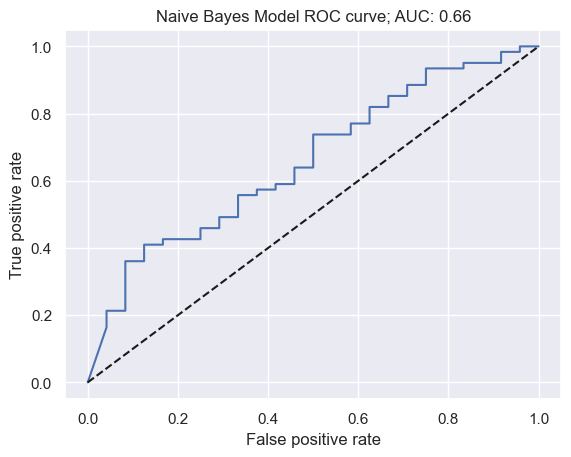

In [43]:
# AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_val_gnb)
auc_nb = np.round(roc_auc_score(y_test, y_pred_proba_val_gnb), 2)
print("AUC:", auc_nb) 

sns.set()
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(f'Naive Bayes Model ROC curve; AUC: {auc_nb}')

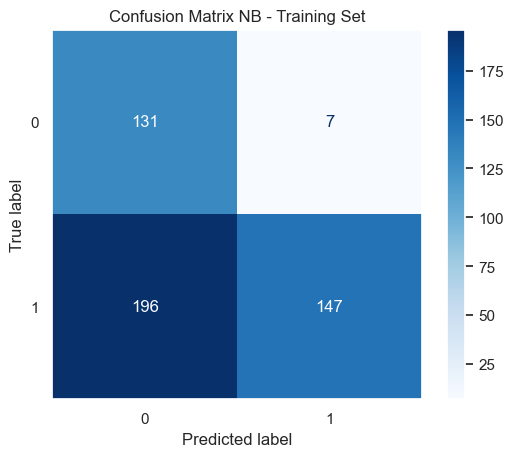

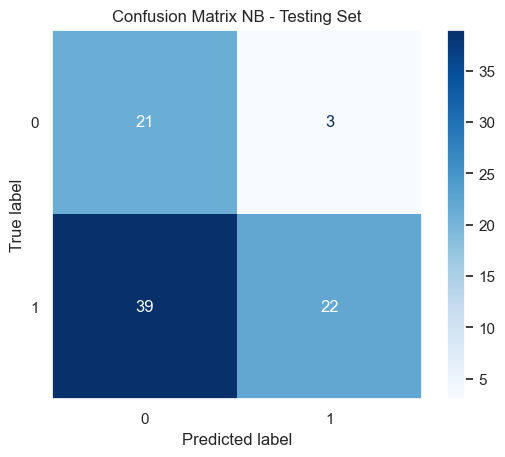

In [44]:
# Confusion matrix for the training set
confusion_display_train = ConfusionMatrixDisplay.from_predictions(y_train, y_pred_gnb_train, cmap = plt.cm.Blues)
confusion_display_train.ax_.set_title('Confusion Matrix NB - Training Set')
plt.grid(False)

# Confusion matrix for the test set 
confusion_display_test = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_val_gnb, cmap = plt.cm.Blues)
confusion_display_test.ax_.set_title('Confusion Matrix NB - Testing Set')
plt.grid(False)

## 5. Logistic Regression

In [45]:
lr = LogisticRegression(max_iter = 2000, class_weight = 'balanced')
model_lr = lr.fit(x_train, y_train)
y_pred_lr_train = model_lr.predict(x_train)

In [46]:
# Prediction on the test set
y_pred_val_lr = model_lr.predict(x_test)
y_pred_proba_val_lr = model_lr.predict_proba(x_test)[:, 1]

In [47]:
# Metrics for the test set 
accuracy_test = accuracy_score(y_test, y_pred_val_lr)
report_val = classification_report(y_test, y_pred_val_lr)
cm_val = confusion_matrix(y_test, y_pred_val_lr)
roc_auc_val = roc_auc_score(y_test, y_pred_proba_val_lr)
precision_val = precision_score(y_test, y_pred_val_lr)
f1_val = f1_score(y_test, y_pred_val_lr, average = 'weighted')
f2_val = fbeta_score(y_test, y_pred_val_lr, beta = 2.0)
mcc_val = matthews_corrcoef(y_test, y_pred_val_lr)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_val_lr).ravel()
specificity_test = tn / (tn + fp)
sensitivity_test = tp / (tp + fn)

print("Accuracy:", accuracy_test.round(2))
print("Classification Report:\n", report_val)
print("Confusion Matrix:\n", cm_val)
print("ROC AUC:", roc_auc_val.round(2))
print("Precision:", precision_val.round(2))
print("F1 Score:", f1_val.round(2))
print("F2 Score:", f2_val.round(2))
print("MCC:", mcc_val.round(2))
print("Specificity:", specificity_test.round(2))
print("Sensitivity:", sensitivity_test.round(2))

Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.79      0.55        24
           1       0.88      0.57      0.69        61

    accuracy                           0.64        85
   macro avg       0.65      0.68      0.62        85
weighted avg       0.75      0.64      0.65        85

Confusion Matrix:
 [[19  5]
 [26 35]]
ROC AUC: 0.71
Precision: 0.88
F1 Score: 0.65
F2 Score: 0.62
MCC: 0.33
Specificity: 0.79
Sensitivity: 0.57


In [48]:
print('Report: training set \n', classification_report(y_train, y_pred_lr_train))
print('\n Report: test set \n', classification_report(y_test, y_pred_val_lr))

Report: training set 
               precision    recall  f1-score   support

           0       0.45      0.87      0.60       138
           1       0.92      0.58      0.71       343

    accuracy                           0.66       481
   macro avg       0.68      0.72      0.65       481
weighted avg       0.78      0.66      0.68       481


 Report: test set 
               precision    recall  f1-score   support

           0       0.42      0.79      0.55        24
           1       0.88      0.57      0.69        61

    accuracy                           0.64        85
   macro avg       0.65      0.68      0.62        85
weighted avg       0.75      0.64      0.65        85



AUC: 0.71


Text(0.5, 1.0, 'Logistic Regression Model ROC curve; AUC: 0.71')

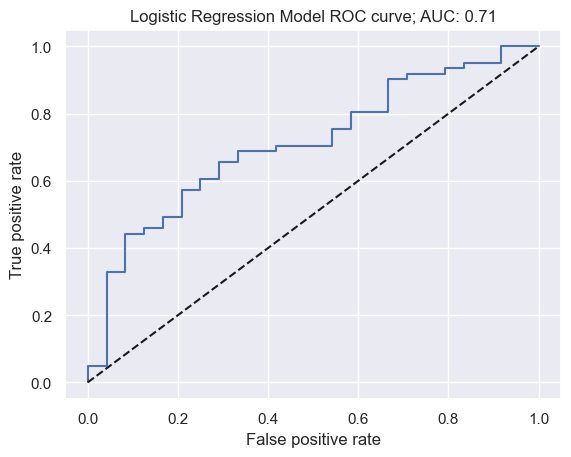

In [49]:
# AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_val_lr)
auc_lr = np.round(roc_auc_score(y_test, y_pred_proba_val_lr), 2)
print("AUC:", auc_lr) 

sns.set()
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(f'Logistic Regression Model ROC curve; AUC: {auc_lr}')

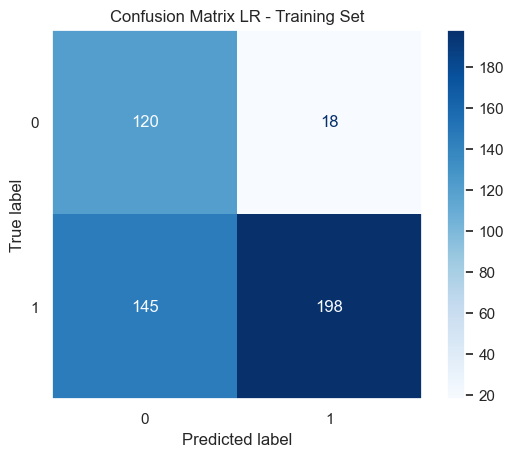

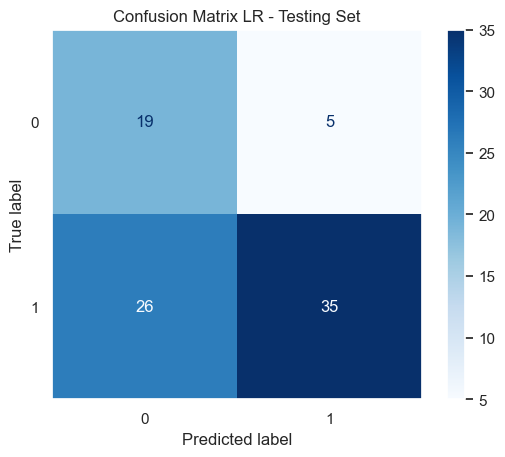

In [50]:
# Confusion matrix for the training set
confusion_display_train = ConfusionMatrixDisplay.from_predictions(y_train, y_pred_lr_train, cmap = plt.cm.Blues)
confusion_display_train.ax_.set_title('Confusion Matrix LR - Training Set')
plt.grid(False)

# Confusion matrix for the test set 
confusion_display_test = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_val_lr, cmap = plt.cm.Blues)
confusion_display_test.ax_.set_title('Confusion Matrix LR - Testing Set')
plt.grid(False)

## 6. SVM

In [51]:
svc = SVC(class_weight='balanced', probability=True)
model_svc = svc.fit(x_train, y_train)
y_pred_svc_train = model_svc.predict(x_train)

In [52]:
# Prediction on the test set
y_pred_val_svc = model_svc.predict(x_test)
y_pred_proba_val_svc = model_svc.predict_proba(x_test)[:, 1]

In [53]:
# Metrics for the test set 
accuracy_test = accuracy_score(y_test, y_pred_val_svc)
report_val = classification_report(y_test, y_pred_val_svc)
cm_val = confusion_matrix(y_test, y_pred_val_svc)
roc_auc_val = roc_auc_score(y_test, y_pred_proba_val_svc)
precision_val = precision_score(y_test, y_pred_val_svc)
f1_val = f1_score(y_test, y_pred_val_svc, average = 'weighted')
f2_val = fbeta_score(y_test, y_pred_val_svc, beta = 2.0)
mcc_val = matthews_corrcoef(y_test, y_pred_val_svc)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_val_svc).ravel()
specificity_test = tn / (tn + fp)
sensitivity_test = tp / (tp + fn)

print("Accuracy:", accuracy_test.round(2))
print("Classification Report:\n", report_val)
print("Confusion Matrix:\n", cm_val)
print("ROC AUC:", roc_auc_val.round(2))
print("Precision:", precision_val.round(2))
print("F1 Score:", f1_val.round(2))
print("F2 Score:", f2_val.round(2))
print("MCC:", mcc_val.round(2))
print("Specificity:", specificity_test.round(2))
print("Sensitivity:", sensitivity_test.round(2)) 

Accuracy: 0.56
Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.79      0.51        24
           1       0.85      0.48      0.61        61

    accuracy                           0.56        85
   macro avg       0.61      0.63      0.56        85
weighted avg       0.72      0.56      0.58        85

Confusion Matrix:
 [[19  5]
 [32 29]]
ROC AUC: 0.67
Precision: 0.85
F1 Score: 0.58
F2 Score: 0.52
MCC: 0.25
Specificity: 0.79
Sensitivity: 0.48


In [54]:
print('Report: training set \n', classification_report(y_train, y_pred_svc_train))
print('\n Report: test set \n', classification_report(y_test, y_pred_val_svc))

Report: training set 
               precision    recall  f1-score   support

           0       0.44      0.89      0.59       138
           1       0.93      0.55      0.69       343

    accuracy                           0.65       481
   macro avg       0.69      0.72      0.64       481
weighted avg       0.79      0.65      0.66       481


 Report: test set 
               precision    recall  f1-score   support

           0       0.37      0.79      0.51        24
           1       0.85      0.48      0.61        61

    accuracy                           0.56        85
   macro avg       0.61      0.63      0.56        85
weighted avg       0.72      0.56      0.58        85



AUC: 0.67


Text(0.5, 1.0, 'SVC Model ROC curve; AUC: 0.67')

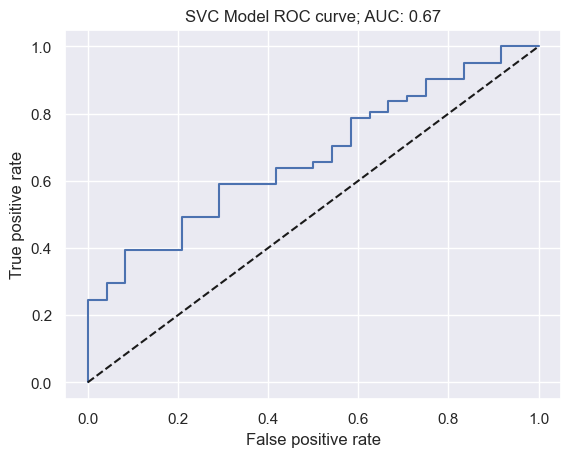

In [55]:
# AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_val_svc)
auc_svc = np.round(roc_auc_score(y_test, y_pred_proba_val_svc), 2)
print("AUC:", auc_svc) 

sns.set()
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(f'SVC Model ROC curve; AUC: {auc_svc}')

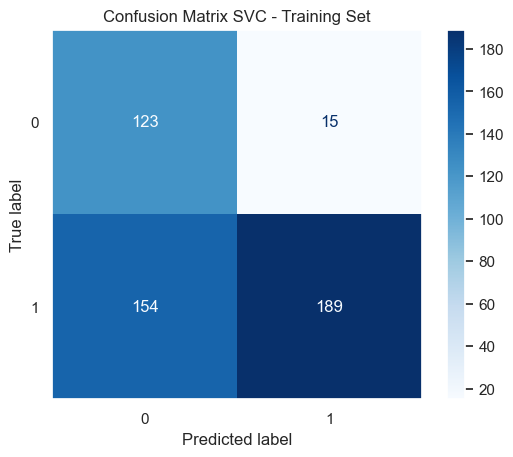

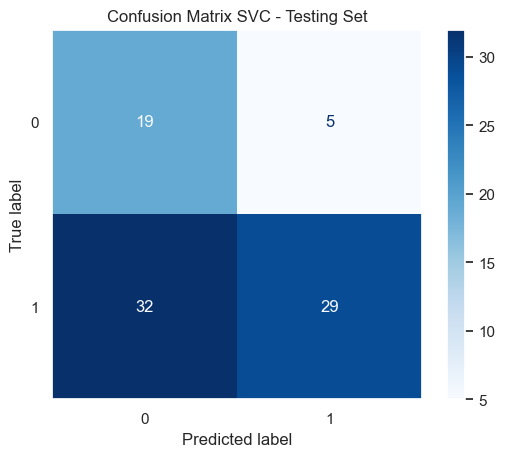

In [56]:
# Confusion matrix for the training set
confusion_display_train = ConfusionMatrixDisplay.from_predictions(y_train, y_pred_svc_train, cmap = plt.cm.Blues)
confusion_display_train.ax_.set_title('Confusion Matrix SVC - Training Set')
plt.grid(False)

# Confusion matrix for the test set 
confusion_display_test = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_val_svc, cmap = plt.cm.Blues)
confusion_display_test.ax_.set_title('Confusion Matrix SVC - Testing Set')
plt.grid(False)

## 7. XGBClassifier

In [57]:
xgb = XGBClassifier(reg_lambda = 0.1, reg_alpha = 0.1, n_estimators = 100, max_depth = 3, learning_rate = 0.01, gamma = 0.4)
model_xgb = xgb.fit(x_train, y_train) 
y_pred_xgb_train = model_xgb.predict(x_train)

In [58]:
# Prediction on the test set
y_pred_val_xgb = model_xgb.predict(x_test)
y_pred_proba_val_xgb = model_xgb.predict_proba(x_test)[:, 1]

In [59]:
# Metrics for the test set 
accuracy_test = accuracy_score(y_test, y_pred_val_xgb)
report_val = classification_report(y_test, y_pred_val_xgb)
cm_val = confusion_matrix(y_test, y_pred_val_xgb)
roc_auc_val = roc_auc_score(y_test, y_pred_proba_val_xgb)
precision_val = precision_score(y_test, y_pred_val_xgb)
f1_val = f1_score(y_test, y_pred_val_xgb, average = 'weighted')
f2_val = fbeta_score(y_test, y_pred_val_xgb, beta = 2.0)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_val_xgb).ravel()
specificity_test = tn / (tn + fp)
sensitivity_test = tp / (tp + fn)

print("Accuracy:", accuracy_test.round(2))
print("Classification Report:\n", report_val)
print("Confusion Matrix:\n", cm_val)
print("ROC AUC:", roc_auc_val.round(2))
print("Precision:", precision_val.round(2))
print("F1 Score:", f1_val.round(2))
print("F2 Score:", f2_val.round(2))
print("MCC:", mcc_val.round(2))
print("Specificity:", specificity_test.round(2))
print("Sensitivity:", sensitivity_test.round(2)) 

Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.12      0.21        24
           1       0.74      0.98      0.85        61

    accuracy                           0.74        85
   macro avg       0.75      0.55      0.53        85
weighted avg       0.74      0.74      0.67        85

Confusion Matrix:
 [[ 3 21]
 [ 1 60]]
ROC AUC: 0.72
Precision: 0.74
F1 Score: 0.67
F2 Score: 0.92
MCC: 0.25
Specificity: 0.12
Sensitivity: 0.98


In [60]:
print('Report: training set \n', classification_report(y_train, y_pred_xgb_train))
print('\n Report: test set \n', classification_report(y_test, y_pred_val_xgb))

Report: training set 
               precision    recall  f1-score   support

           0       0.84      0.12      0.20       138
           1       0.74      0.99      0.84       343

    accuracy                           0.74       481
   macro avg       0.79      0.55      0.52       481
weighted avg       0.77      0.74      0.66       481


 Report: test set 
               precision    recall  f1-score   support

           0       0.75      0.12      0.21        24
           1       0.74      0.98      0.85        61

    accuracy                           0.74        85
   macro avg       0.75      0.55      0.53        85
weighted avg       0.74      0.74      0.67        85



AUC: 0.72


Text(0.5, 1.0, 'XGB Model ROC curve; AUC: 0.72')

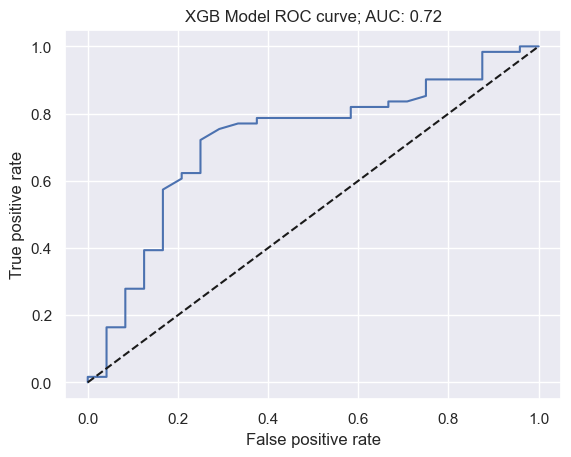

In [61]:
# AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_val_xgb)
auc_xgb = np.round(roc_auc_score(y_test, y_pred_proba_val_xgb), 2)
print("AUC:", auc_xgb) 

sns.set()
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(f'XGB Model ROC curve; AUC: {auc_xgb}')

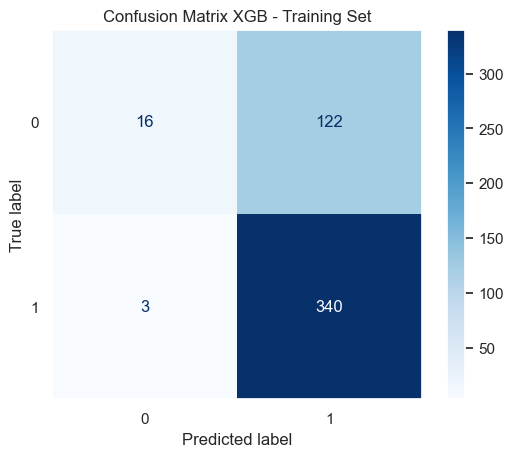

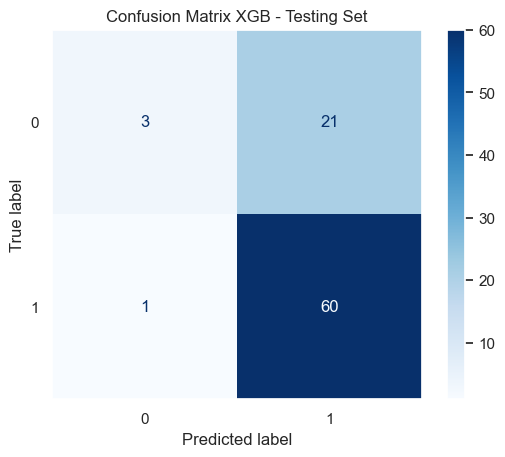

In [62]:
# Confusion matrix for the training set
confusion_display_train = ConfusionMatrixDisplay.from_predictions(y_train, y_pred_xgb_train, cmap = plt.cm.Blues)
confusion_display_train.ax_.set_title('Confusion Matrix XGB - Training Set')
plt.grid(False)

# Confusion matrix for the test set 
confusion_display_test = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_val_xgb, cmap = plt.cm.Blues)
confusion_display_test.ax_.set_title('Confusion Matrix XGB - Testing Set')
plt.grid(False)

# Model Comparison - selecting the best model

In [63]:
# Lists of models and predictors
models = ['KNN', 'RF', 'CART', 'NB', 'LogReg', 'SVC', 'XGB']
predictions = [y_pred_val_knn, y_pred_val_rfc, y_pred_val_dtc, y_pred_val_gnb, y_pred_val_lr, y_pred_val_svc, y_pred_val_xgb]

# Lists for results
accuracies = []
auc_scores = []
auprc_scores = []
precisions = []
recalls = []
f1_scores = []
f2_scores = []
specificities = []
sensitivities = []
mcc_scores = []

# Calculate metrics
for pred in predictions:
    accuracy = accuracy_score(y_test, pred)
    accuracies.append(accuracy.round(2))
    auc = roc_auc_score(y_test, pred)
    auc_scores.append(auc.round(2))
    auprc = average_precision_score(y_test, pred)
    auprc_scores.append(auprc.round(2))
    precision = precision_score(y_test, pred)
    precisions.append(precision.round(2))
    recall = recall_score(y_test, pred)
    recalls.append(recall.round(2))
    f1_calculated = f1_score(y_test, pred)
    f1_scores.append(f1_calculated.round(2))
    f2 = fbeta_score(y_test, pred, beta=2.0)
    f2_scores.append(f2.round(2))
    mcc = matthews_corrcoef(y_test, pred)
    mcc_scores.append(mcc.round(2))
    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
    specificity = tn / (tn + fp)
    specificities.append(specificity.round(2))
    sensitivity = tp / (tp + fn)
    sensitivities.append(sensitivity.round(2))

# DataFrame to display the results
modele_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'AUC': auc_scores,
    'AUPRC': auprc_scores,
    'F1': f1_scores,
    'F2': f2_scores,
    'Specificity': specificities,
    'Sensitivity': sensitivities,
    'MCC': mcc_scores
})

# Sorting for F2
modele_df_sorted = modele_df.sort_values(by = 'F2', ascending = False)

# reset index to start at 1, not 0
modele_df_sorted.index = range(1, len(modele_df_sorted) + 1)

# Displaying results
modele_df_sorted

,Model,Accuracy,Precision,Recall,AUC,AUPRC,F1,F2,Specificity,Sensitivity,MCC
1,XGB,0.74,0.74,0.98,0.55,0.74,0.85,0.92,0.12,0.98,0.23
2,KNN,0.64,0.75,0.74,0.56,0.74,0.74,0.74,0.38,0.74,0.11
3,RF,0.64,0.75,0.74,0.56,0.74,0.74,0.74,0.38,0.74,0.11
4,LogReg,0.64,0.88,0.57,0.68,0.81,0.69,0.62,0.79,0.57,0.33
5,SVC,0.56,0.85,0.48,0.63,0.78,0.61,0.52,0.79,0.48,0.25
6,CART,0.54,0.84,0.44,0.62,0.77,0.58,0.49,0.79,0.44,0.22
7,NB,0.51,0.88,0.36,0.62,0.78,0.51,0.41,0.88,0.36,0.23


## Results:
## According to F2 top3 best models:
## 1. XGB
## 2. RF
## 3. KNN
## Top worst models:
## 1. CART
## 2. SVC
## 3. NB

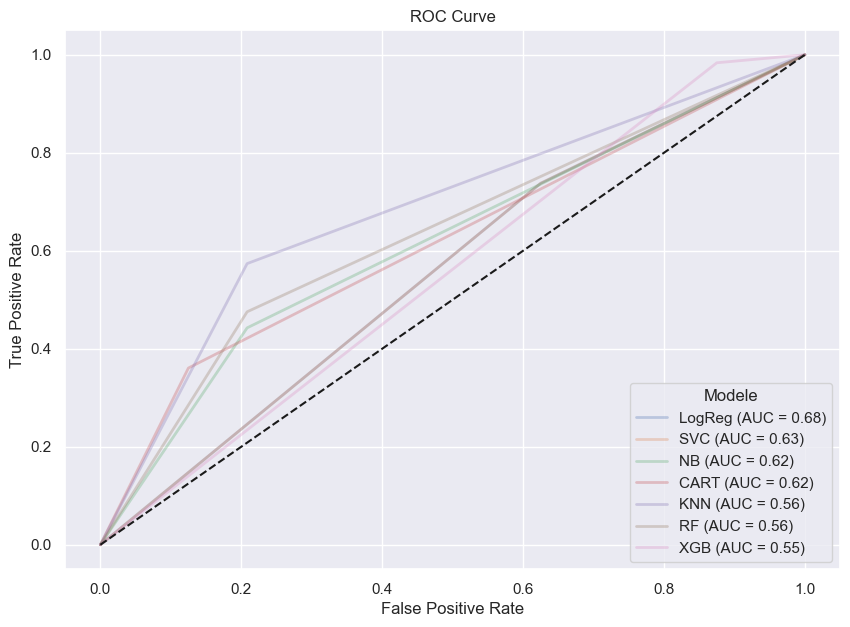

In [64]:
# ROC curves for all models
plt.figure(figsize=(10, 7)) 

# Tuple for storing AUC results and legend tags
legend_labels_and_aucs = []

for model, pred in zip(models, predictions):
    auc = roc_auc_score(y_test, pred)
    auc_scores.append(auc)
    fpr, tpr, _ = roc_curve(y_test, pred)
    plt.plot(fpr, tpr, lw=2, alpha=0.3)
    legend_labels_and_aucs.append((model, auc))

# Sorted legend labels based on AUC score
sorted_legend_labels_and_aucs = sorted(legend_labels_and_aucs, key=lambda x: x[1], reverse=True)
sorted_legend_labels = [f'{x[0]} (AUC = {x[1]:.2f})' for x in sorted_legend_labels_and_aucs]

plt.plot([0, 1], [0, 1], 'k--', label = 'Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(sorted_legend_labels, title = 'Models', loc = 'lower right')

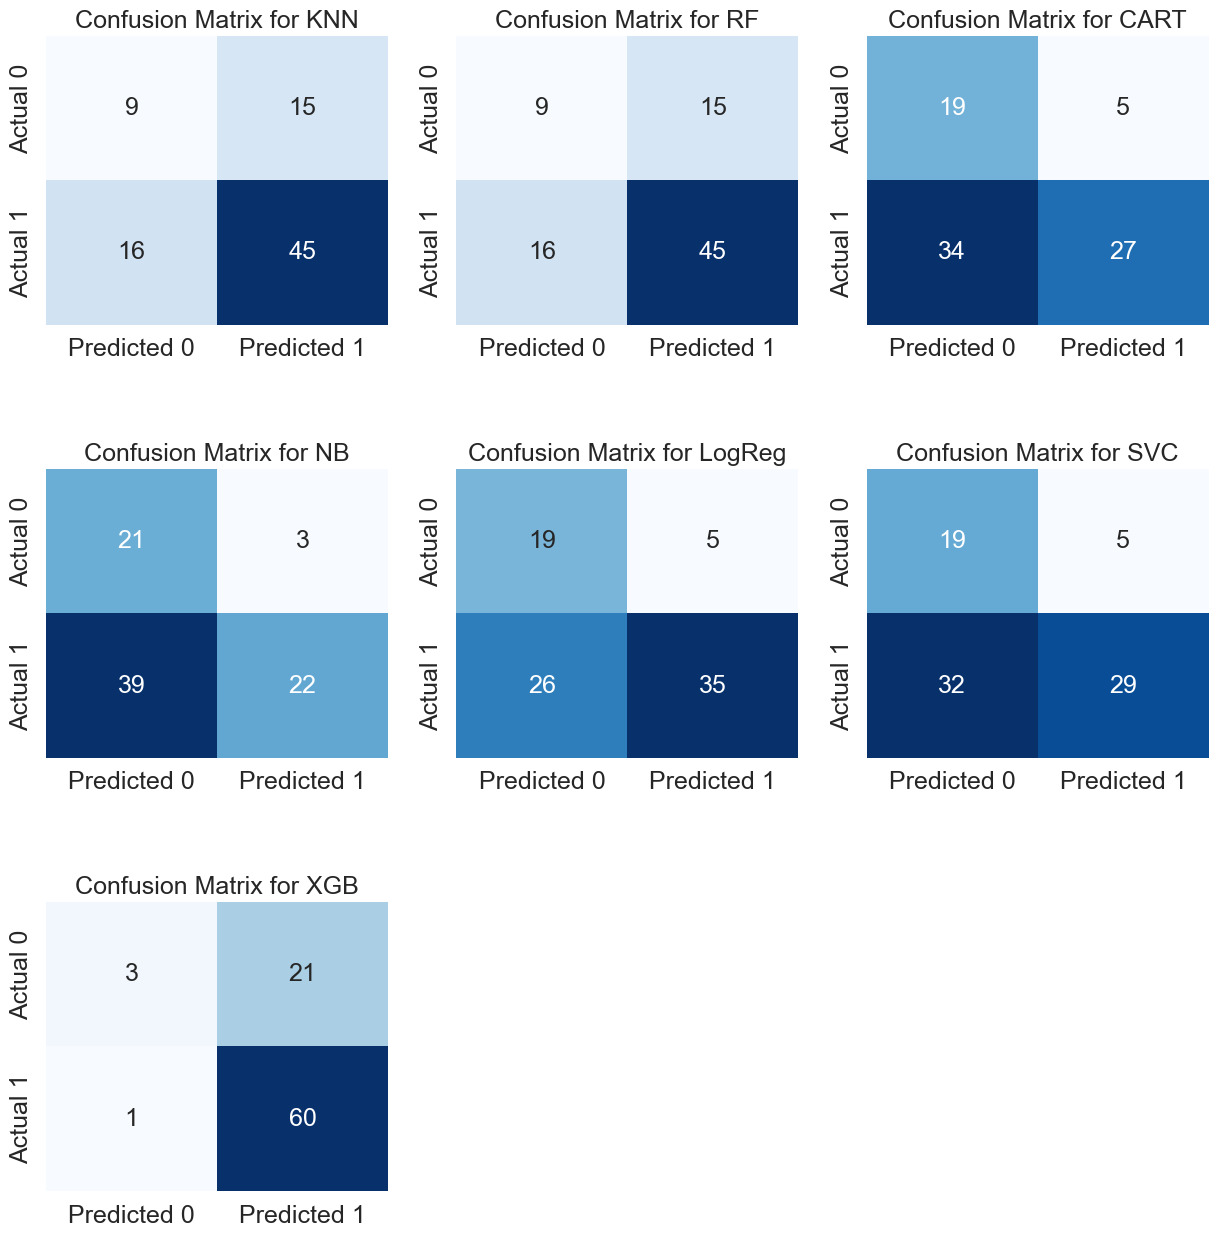

In [65]:
num_models = len(models)
max_matrices_per_row = 3
num_rows = int(np.ceil(num_models / max_matrices_per_row))
num_cols = min(num_models, max_matrices_per_row)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
fig.subplots_adjust(hspace=0.5)

font_size = 18

for i, (model_name, y_pred) in enumerate(zip(models, predictions)):
    row = i // max_matrices_per_row
    col = i % max_matrices_per_row
    cm = confusion_matrix(y_test, y_pred)
    ax = axs[row, col]
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'], 
                yticklabels=['Actual 0', 'Actual 1'], ax=ax,
                annot_kws={"size": font_size})
    
    # Set font size for tick labels
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=font_size)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=font_size)
    
    ax.set_title(f'Confusion Matrix for {model_name}', fontsize=font_size)

# Remove any empty subplots if needed
if num_models < (num_rows * max_matrices_per_row):
    for i in range(num_models, num_rows * max_matrices_per_row):
        row = i // max_matrices_per_row
        col = i % max_matrices_per_row
        fig.delaxes(axs[row, col])

## Considering all metrics, a better model is RF than XGB.